In [1]:
from keras.datasets import cifar10
from keras.models import Model
from keras.optimizers import Adam
from keras.utils import to_categorical

from keras.layers import *
from keras.models import Sequential

%matplotlib inline  

Using TensorFlow backend.


In [2]:
num_classes = 10 

batch_size = 1024 

epochs = 10 

In [3]:
# 讀取資料集並作前處理
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train = x_train / 255.
x_test = x_test / 255.

y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

y_train = y_train.astype('float32')
y_test = y_test.astype('float32')

print('y_train shape:', y_train.shape)


x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples
y_train shape: (50000, 10)


In [4]:
def test_model_runnable(model, x_train, y_train, batch_size=16):
    try:
        print(f"test model runnable {'-'*40}")
        model.compile(
                loss='categorical_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])
            
        model.fit(
                x_train[:batch_size], y_train[:batch_size], 
                batch_size=batch_size,
                epochs=1,
                verbose=1)

        #keras.backend.clear_session() # 把舊的 Graph 清掉
            
    except Exception as e: 
        print(f"run model error!")
        print(f"{type(e)}:\n{str(e)}")

In [5]:
import pydot
from IPython.display import Image 
import keras
from IPython.display import display

def model_image(model, to_file):
    # ref: https://keras.io/utils/#print_summary
    keras.utils.plot_model(model, to_file=to_file, show_shapes=True, show_layer_names=True, rankdir='TB')

    return Image(filename=to_file)

def display_model_info(model, title=None):
    print(model.summary())
    print()
    print(f'layers: {len(model.layers)}')
    print()

    if title:
        print(f"model({title}):{'-'*60}")
    img = model_image(model, 'model.png')
    display(img) 


ref:  
    [Application ResNet](https://keras.io/applications/#resnet)

Instructions for updating:
Colocations handled automatically by placer.
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
_____________________________________

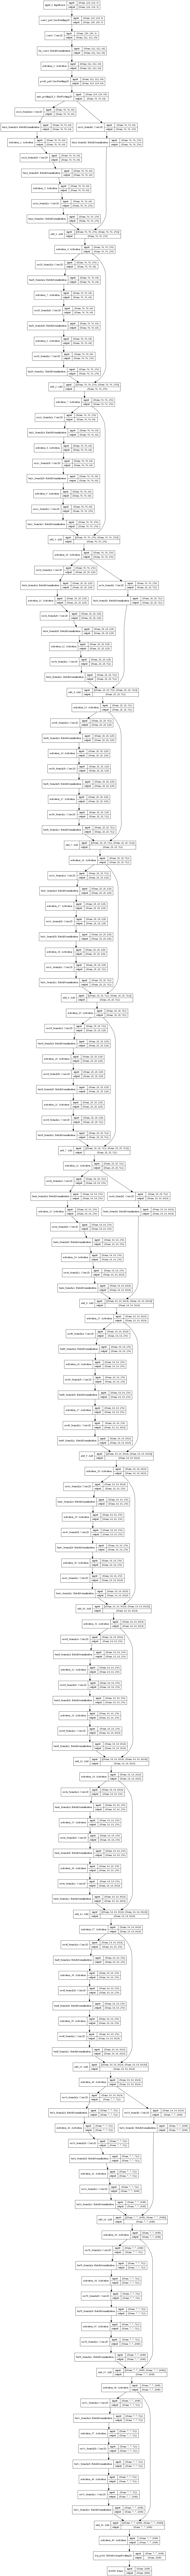

In [6]:
def build_model_ResNet50():
    from keras.applications.resnet50 import ResNet50

    model_resnet50 = ResNet50() 
    return model_resnet50

model_resnet50 = build_model_ResNet50()
display_model_info(model_resnet50, title="ResNet50")

In [7]:
test_model_runnable(model_resnet50, x_train, y_train)

test model runnable ----------------------------------------
run model error!
<class 'ValueError'>:
Error when checking input: expected input_1 to have shape (224, 224, 3) but got array with shape (32, 32, 3)


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Model)             (None, 1000)              25636712  
_________________________________________________________________
dense_1 (Dense)              (None, 512)               512512    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5130      
Total params: 26,154,354
Trainable params: 26,101,234
Non-trainable params: 53,120
_________________________________________________________________
None

layers: 3

model(new model base on ResNet50):------------------------------------------------------------


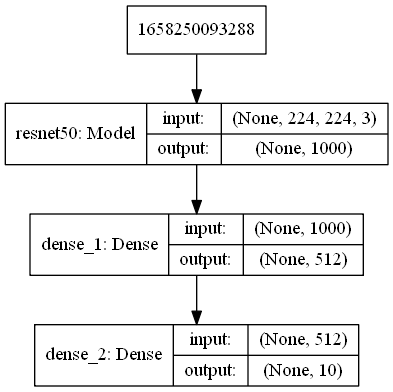

In [8]:
def build_model_on_resnet50():
    resnet50 = build_model_ResNet50()
    
    new_model = Sequential()
    new_model.add(resnet50)
    #new_model.layers[0].trainable = False

    new_model.add(Dense(512, activation='relu'))
    new_model.add(Dense(num_classes, activation='softmax'))
    
    return new_model

model = build_model_on_resnet50()
display_model_info(model, title="new model base on ResNet50")

In [9]:
test_model_runnable(model, x_train, y_train)

test model runnable ----------------------------------------
run model error!
<class 'ValueError'>:
Error when checking input: expected resnet50_input to have shape (224, 224, 3) but got array with shape (32, 32, 3)


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Model)             (None, 2048)              23587712  
_________________________________________________________________
dense_3 (Dense)              (None, 512)               1049088   
_________________________________________________________________
dense_4 (Dense)              (None, 10)                5130      
Total params: 24,641,930
Trainable params: 1,054,218
Non-trainable params: 23,587,712
_________________________________________________________________
None

layers: 3

model(new model base on ResNet50 (include_top=False)):------------------------------------------------------------


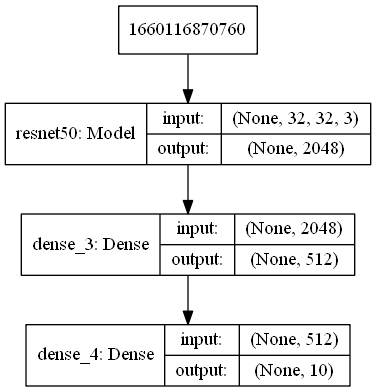

In [10]:
from keras.applications.resnet50 import ResNet50

def build_model_on_resnet50_no_top():
    # 建立模型
    # ref: https://ithelp.ithome.com.tw/articles/10190971
    # build cifar10 model base on ResNet50
    resnet50 = ResNet50(include_top=False, 
                         input_shape=(32,32,3),
                         weights='imagenet',
                         pooling="avg",
                        ) 
    
    new_model = Sequential()
    # 移除最後一層 (1000) 原 ResNet50 classes = 1000
    resnet50.layers.pop()
    for layer in resnet50.layers:
        layer.trainable = False

    new_model.add(resnet50)

    new_model.add(Dense(512, activation='relu'))
    new_model.add(Dense(num_classes, activation='softmax'))
    
    return new_model

model = build_model_on_resnet50_no_top()
display_model_info(model, title="new model base on ResNet50 (include_top=False)")

In [11]:
test_model_runnable(model, x_train, y_train)

test model runnable ----------------------------------------
Instructions for updating:
Use tf.cast instead.
Epoch 1/1
16/16 [==============================] - 6s 402ms/step - loss: 3.1392 - acc: 0.1250


C:\AI_course\Anaconda3\lib\site-packages\keras_applications\resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 38, 38, 3)    0           input_4[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 16, 16, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 16, 16, 64)   256         conv1[0][0]                 

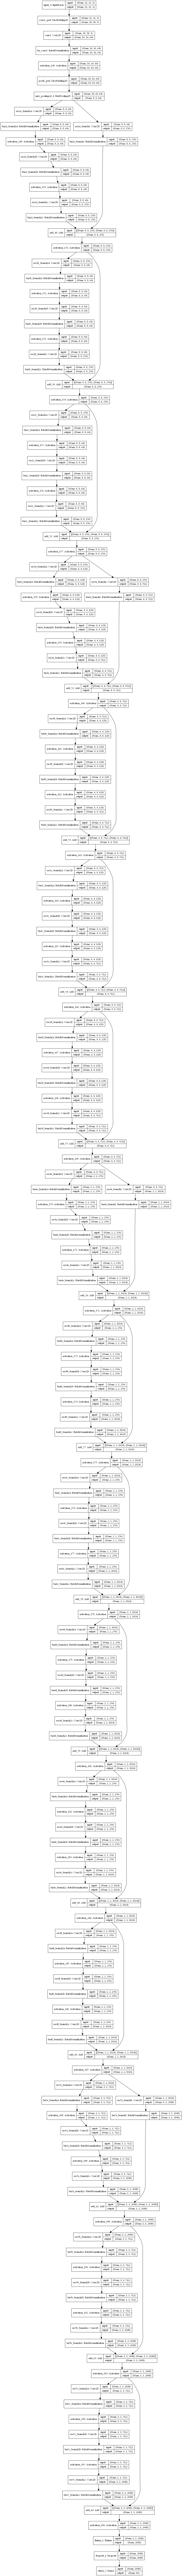

In [12]:
resnet50 = ResNet50(include_top=False, 
                    weights='imagenet', 
                    input_shape=(32,32,3))

resnet50.layers.pop()
for layer in resnet50.layers:
    layer.trainable = False
    
x = resnet50.output

x = Flatten()(x)
x = Dropout(0.5)(x)

output_layer = Dense(num_classes, activation='softmax')(x)

model = Model(inputs=resnet50.input, outputs=output_layer)

display_model_info(model, title="model(Cifar10 base on ResNet50)")

In [13]:
test_model_runnable(model, x_train, y_train)

test model runnable ----------------------------------------
Epoch 1/1
16/16 [==============================] - 6s 381ms/step - loss: 3.1153 - acc: 0.2500


__________________


depth=11
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 32, 32, 16)   448         input_5[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 32, 32, 16)   64          conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_197 (Activation)     (None, 32, 32, 16)   0           batch_normalization_1[0][0]      
__________________________________________________________________________________________________


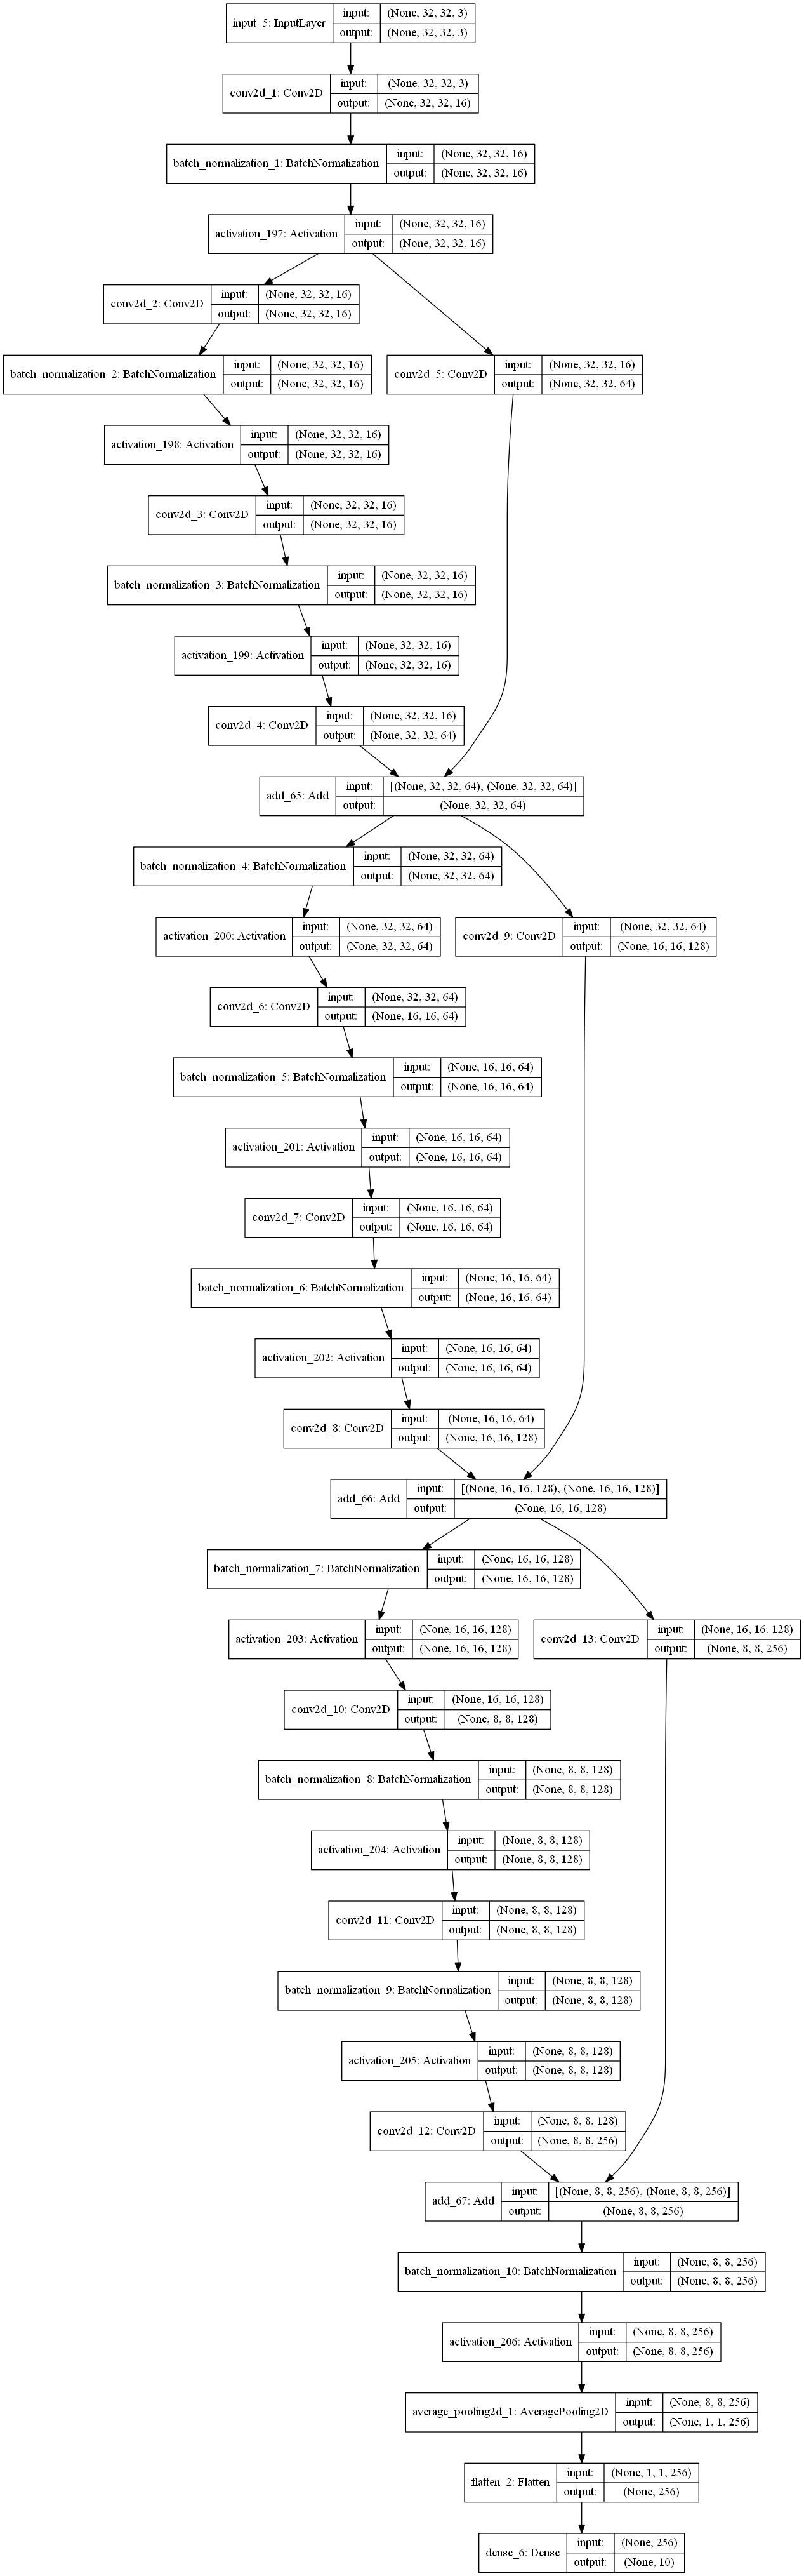

test model runnable ----------------------------------------
Epoch 1/1
16/16 [==============================] - 10s 599ms/step - loss: 2.6978 - acc: 0.0625

depth=20
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
conv2d_14 (Conv2D)              (None, 32, 32, 16)   448         input_6[0][0]                    
__________________________________________________________________________________________________
batch_normalization_11 (BatchNo (None, 32, 32, 16)   64          conv2d_14[0][0]                  
__________________________________________________________________________________________________
activation_207 (Activation)     (None, 32,

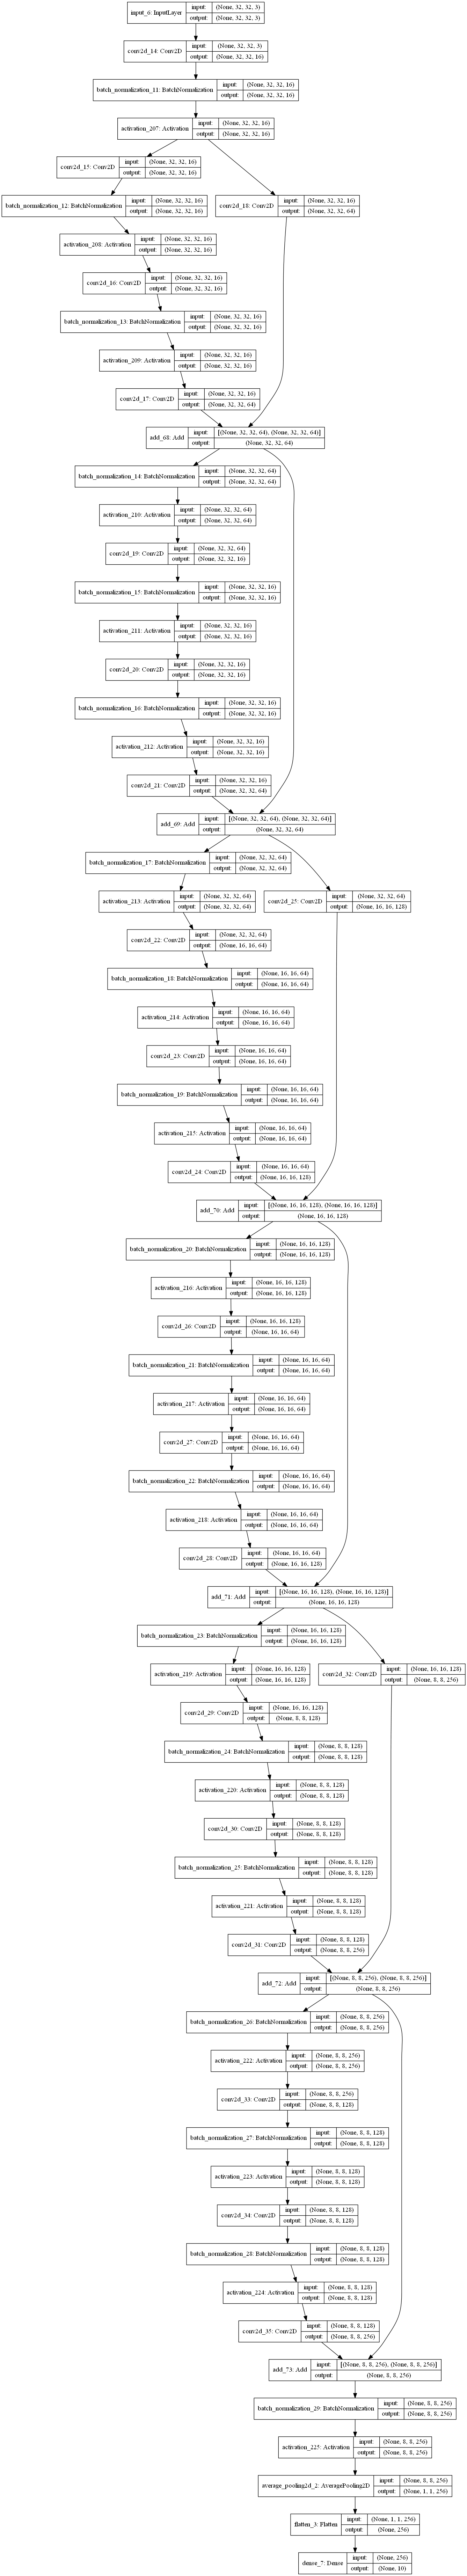

In [14]:
import resnet_builder as resnet_builder

from resnet_builder import resnet # 這是從 resnet_builder.py 中直接 import 撰寫好的 resnet_v1 函數

for n in range(1, 3):
    depth = 9*n+2
    print(f"\ndepth={depth}")
    model = resnet(input_shape=(32,32,3),depth=depth,num_classes=num_classes)
    display_model_info(model, title="model(Cifar10 by resnet_builder)")
    
    if n == 1:
        test_model_runnable(model, x_train, y_train)

## 作業
礙於不是所有同學都有 GPU ，這邊的範例使用的是簡化版本的 ResNet，確保所有同學都能夠訓練!

最後一天的作業請先參考這篇[非常詳盡的文章](https://blog.gtwang.org/programming/keras-resnet-50-pre-trained-model-build-dogs-cats-image-classification-system/)，基本上已經涵蓋了所有訓練　CNN 常用的技巧，只要能夠妥善運用這些技巧 (資料增強、遷移學習、調整學習率)，即使簡單的模型也能帶來很高的基準點，再以此基準點微調參數，達到最佳的結果。

另外這些技巧在 Kaggle 上也會被許多人使用，更有人會開發一些新的技巧，例如使把預訓練在 ImageNet 上的模型當成 feature extractor 後，再拿擷取出的特徵重新訓練新的模型，這些技巧再進階的課程我們會在提到，有興趣的同學也可以[參考](https://www.kaggle.com/insaff/img-feature-extraction-with-pretrained-resnet

In [15]:
def calc_steps_per_epoch(data_size, batch_size):
    steps = data_size // batch_size
    if data_size % batch_size != 0:
        steps += 1
    return steps

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
conv2d_36 (Conv2D)              (None, 32, 32, 16)   448         input_7[0][0]                    
__________________________________________________________________________________________________
batch_normalization_30 (BatchNo (None, 32, 32, 16)   64          conv2d_36[0][0]                  
__________________________________________________________________________________________________
activation_226 (Activation)     (None, 32, 32, 16)   0           batch_normalization_30[0][0]     
__________________________________________________________________________________________________
conv2d_37 

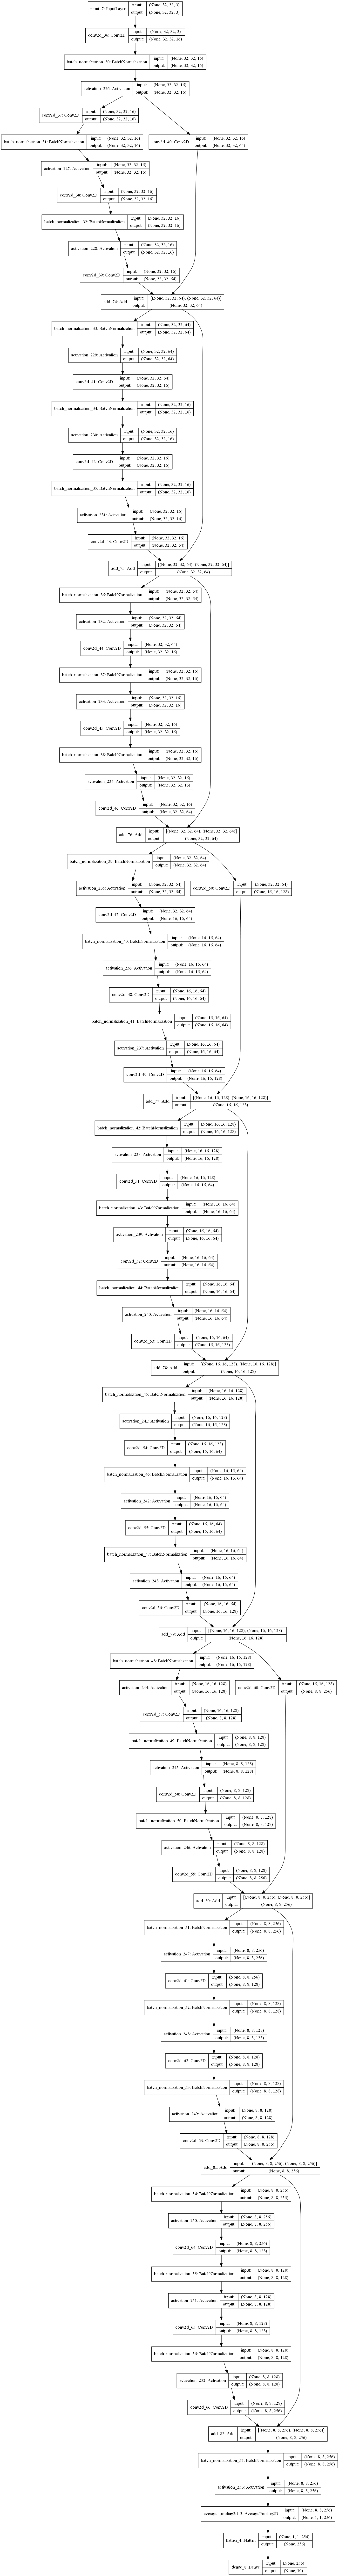

In [16]:
import resnet_builder as resnet_builder

from resnet_builder import resnet # 這是從 resnet_builder.py 中直接 import 撰寫好的 resnet_v1 函數

model = resnet(input_shape=(32,32,3), num_classes=num_classes)
display_model_info(model)


In [17]:
from keras.preprocessing.image import ImageDataGenerator

# 建立 ImageDataGenerator，並指定我們要做資料增強的數值範圍
data_generator = ImageDataGenerator(
                    rotation_range=10,
                    width_shift_range=0.2,
                    height_shift_range=0.2,
                    horizontal_flip=True)

In [18]:
from keras.callbacks import EarlyStopping
from keras.callbacks import ReduceLROnPlateau

earlystop = EarlyStopping(monitor="val_loss", 
                          patience=10, 
                          verbose=1
                          )

reduce_lr = ReduceLROnPlateau(factor=0.5, 
                              min_lr=1e-12, 
                              monitor='val_loss', 
                              patience=10, 
                              verbose=1)
callbacks = [earlystop, reduce_lr]

In [19]:
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

history = model.fit_generator(
                data_generator.flow(x_train, y_train, batch_size=batch_size),
                steps_per_epoch=calc_steps_per_epoch(len(x_train), batch_size),
                epochs=epochs,
                verbose=1,
                validation_data=(x_test, y_test),
                callbacks=callbacks)

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1]) 

Epoch 1/10
49/49 [==============================] - 1077s 22s/step - loss: 2.3343 - acc: 0.3605 - val_loss: 2.1927 - val_acc: 0.4020
Epoch 2/10
49/49 [==============================] - 1018s 21s/step - loss: 1.9485 - acc: 0.4871 - val_loss: 2.6007 - val_acc: 0.3159
Epoch 3/10
49/49 [==============================] - 1019s 21s/step - loss: 1.7436 - acc: 0.5532 - val_loss: 2.0724 - val_acc: 0.4417
Epoch 4/10
49/49 [==============================] - 1020s 21s/step - loss: 1.6007 - acc: 0.5944 - val_loss: 2.6869 - val_acc: 0.3456
Epoch 5/10
49/49 [==============================] - 1018s 21s/step - loss: 1.4889 - acc: 0.6276 - val_loss: 1.7965 - val_acc: 0.5255
Epoch 6/10
49/49 [==============================] - 1021s 21s/step - loss: 1.4102 - acc: 0.6521 - val_loss: 1.8615 - val_acc: 0.5245
Epoch 7/10
49/49 [==============================] - 1019s 21s/step - loss: 1.3387 - acc: 0.6732 - val_loss: 1.7463 - val_acc: 0.5491
Epoch 8/10
49/49 [==============================] - 1023s 21s/step - 

## 進階挑戰!
有志以成為機器學習工程師為目標的同學們可以參加這個挑戰，這[網站](https://rodrigob.github.io/are_we_there_yet/build/classification_datasets_results.html#43494641522d3130)記錄了歷年來 Cifar-10 中排名最高的論文，請試著閱讀論文並撰寫出相對應的程式碼，復現出論文的結果。

這樣的能力在機器學習領域中是非常重要的，具備閱讀他人論文並實現的能力，可為自己在履歷上增添不少分數，當然難度也相當高，若是不透徹了解文章內容或是程式能力不夠紮實，可是不能復現別人辛苦的研究成果的喔! 就請各位同學好好努力，往自己的機器學習之路邁進吧:)